# US Accidents Exploratory Data Analysis

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset. Check [here](https://smoosavi.org/datasets/us_accidents) to learn more about this dataset.

- Dataset Source: kaggle
- What it contains?: Information about the accidents in US from 2016-2021
- How will it be useful?: Can be useful to prevent accidents

## Import Libraries

In [1]:
from urllib.request import urlretrieve

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Download Dataset Using Opendatasets

In [4]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import opendatasets as od

In [6]:
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

In [7]:
od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [8]:
pd.set_option('display.max_columns', None)

## Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [9]:
df = pd.read_csv('./us-accidents/US_Accidents_Dec21_updated.csv')

In [10]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [13]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [14]:
numeric_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


#### Percentage of missing value per column

In [15]:
len(df)

2845342

In [16]:
df.isna().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [17]:
missing_values_percentages = (df.isna().sum().sort_values(ascending=False) * 100)/len(df)
missing_values_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [18]:
# As it can be seen that we have zero percentages in the series, 
#so we get rid of them to plot the graph

missing_values_percentages[missing_values_percentages != 0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

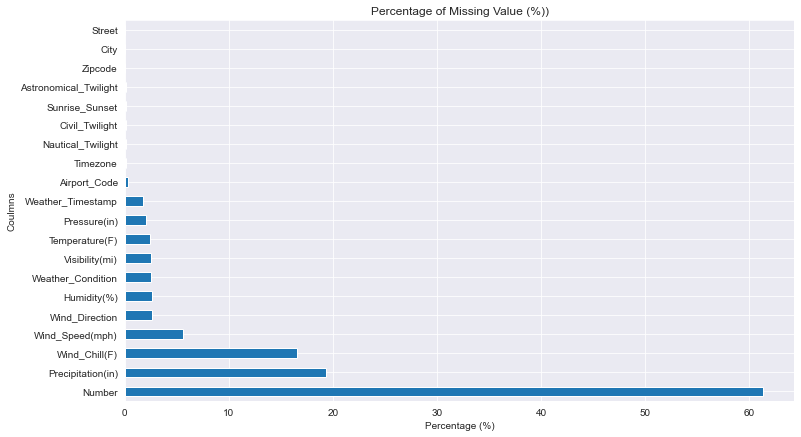

In [19]:
plt.figure(figsize=(12,7))
missing_values_percentages[missing_values_percentages != 0].plot(kind='barh')
plt.title("Percentage of Missing Value (%))")
plt.xlabel("Percentage (%)")
plt.ylabel("Coulmns")
plt.show()

## Exploratory Data Analysis

- Pciking coulmns to analyze:
> 1. City
> 2. Start Time
> 3. Start lat and Start long
> 4. Temperature (To do)
> 5. Weather Condition (To do)

In [20]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## 1. CITY

In [21]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [22]:
cities = df.City.unique()
cities


array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [23]:
df.City.nunique()

11681

In [24]:
len(cities)

11682

##### There are 19,495 incorporated cities, towns and villages in the United States. Out of which we have data of 11681.

In [25]:
cities_by_numer_accidents = df.City.value_counts()
cities_by_numer_accidents

Miami            106966
Los Angeles       68956
Orlando           54691
Dallas            41979
Houston           39448
                  ...  
Willowick             1
Blounts Creek         1
Withee                1
Holmen                1
Cat Spring            1
Name: City, Length: 11681, dtype: int64

In [26]:
df.City.isna().sum()

137

In [27]:
len(cities_by_numer_accidents)

11681

### Top 20 Cities by High Number of Accidents

In [28]:
cities_by_numer_accidents.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

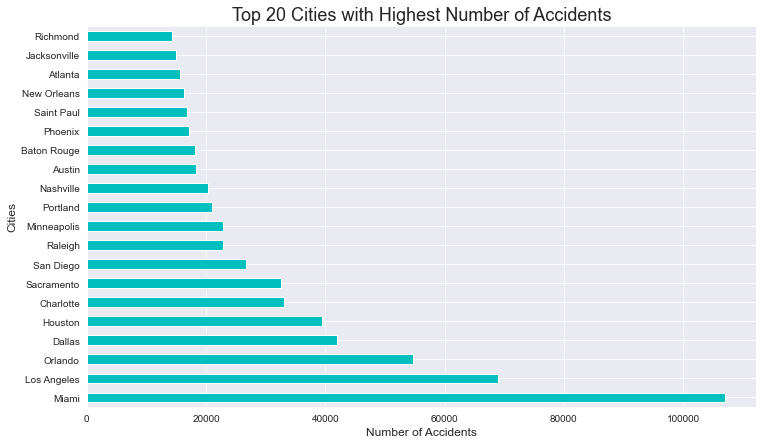

In [29]:
plt.figure(figsize=(12,7))
cities_by_numer_accidents[:20].plot(kind = 'barh', color='c')
plt.title("Top 20 Cities with Highest Number of Accidents",size = 18)
plt.ylabel("Cities",size = 12)
plt.xlabel("Number of Accidents",size = 12)
plt.show()

#### Checking if "Washington" is in City Column

In [30]:
'Washington' in df.City.value_counts()

True

In [31]:
df.City.value_counts()['Washington']

9624

In [32]:
df.City.isin(['Washington']).value_counts()

False    2835718
True        9624
Name: City, dtype: int64

In [33]:
'Washington' in df.City.values

True

In [34]:
'DC' in df.State.values

True

##### There are 50 States in the United States. Out of which we have data of 49 States.

### Top 20 States with Highest Number of Accidents

In [35]:
df.State.value_counts().head(5)

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

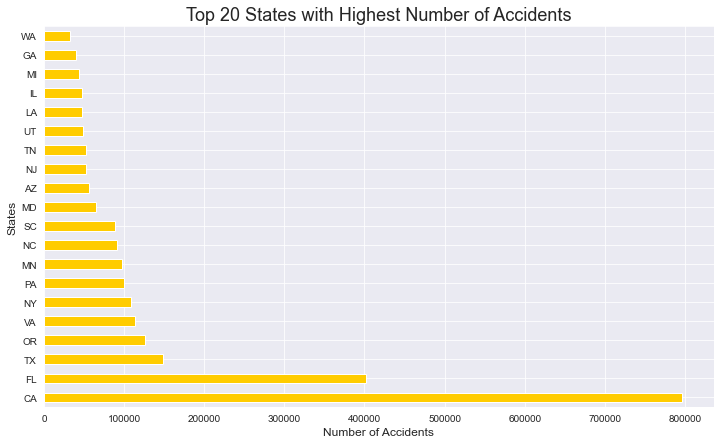

In [36]:
plt.figure(figsize=(12,7))
df.State.value_counts()[:20].plot(kind='barh', color='#ffcc00')
plt.title("Top 20 States with Highest Number of Accidents", size = 18)
plt.ylabel("States",size = 12)
plt.xlabel("Number of Accidents",size = 12)
plt.show()

In [37]:
len(df.State.unique())

49

In [38]:
len(cities_by_numer_accidents)

11681

In [39]:
cities_by_numer_accidents

Miami            106966
Los Angeles       68956
Orlando           54691
Dallas            41979
Houston           39448
                  ...  
Willowick             1
Blounts Creek         1
Withee                1
Holmen                1
Cat Spring            1
Name: City, Length: 11681, dtype: int64

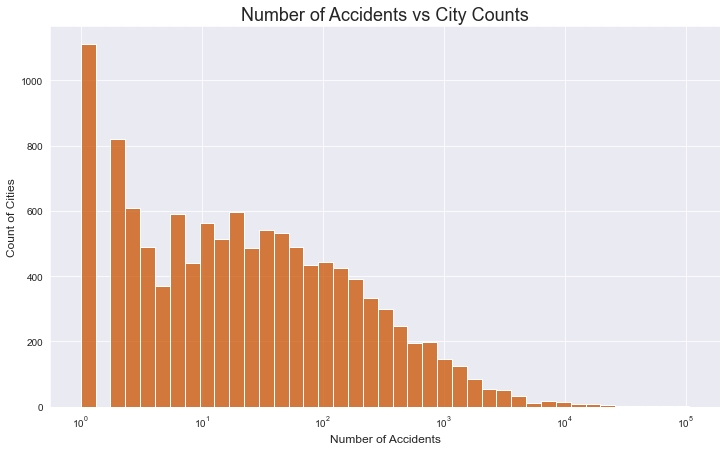

In [40]:
plt.figure(figsize=(12,7))
sns.histplot(cities_by_numer_accidents, log_scale=True, color='#cc5200')
plt.title("Number of Accidents vs City Counts",size = 18)
plt.xlabel("Number of Accidents",size = 12)
plt.ylabel("Count of Cities",size = 12)
plt.show()

In [41]:
high_accident_cities = cities_by_numer_accidents[cities_by_numer_accidents >= 1000]
low_accident_cities = cities_by_numer_accidents[cities_by_numer_accidents < 1000]

In [42]:
len(high_accident_cities)/len(cities)

0.04245848313644924

In [43]:
len(low_accident_cities)/len(cities)

0.9574559150830337

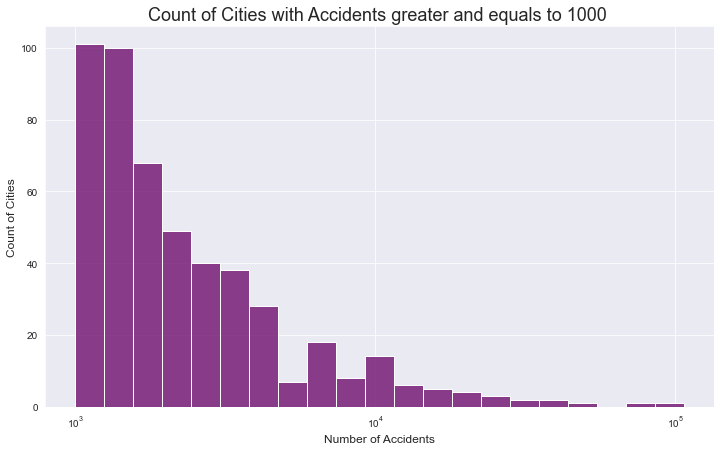

In [44]:
plt.figure(figsize=(12,7))
sns.histplot(high_accident_cities, log_scale=True, color = '#660066')
plt.title("Count of Cities with Accidents greater and equals to 1000 ",size = 18)
plt.xlabel("Number of Accidents",size = 12)
plt.ylabel("Count of Cities",size = 12)
plt.show()

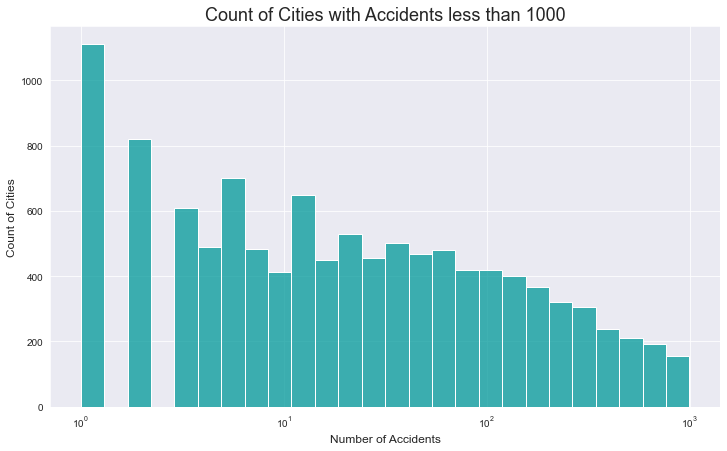

In [45]:
plt.figure(figsize=(12,7))
sns.histplot(low_accident_cities, log_scale=True, color = '#009999')
plt.title("Count of Cities with Accidents less than 1000", size = 18)
plt.xlabel("Number of Accidents",size = 12)
plt.ylabel("Count of Cities",size = 12)
plt.show()

In [46]:
cities_by_numer_accidents[cities_by_numer_accidents == 1]

Wilkinson        1
Ambrose          1
Masardis         1
Jolley           1
New Bavaria      1
                ..
Willowick        1
Blounts Creek    1
Withee           1
Holmen           1
Cat Spring       1
Name: City, Length: 1110, dtype: int64

- Can be seen that obtained an exponentially decreasing graphs for both the low and high accident cities, and exponential distribution can be tricky in drawing graphs as just going down and being flat. So for that I have "logarithmic scale". 

## 2. START TIME

In [47]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [48]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [49]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [50]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [51]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

### - Hour

In [52]:
pd.DatetimeIndex(df.Start_Time).hour

Int64Index([ 0,  5,  6,  6,  7,  8,  8, 11, 14, 15,
            ...
            17, 17, 17, 17, 18, 18, 19, 19, 19, 18],
           dtype='int64', name='Start_Time', length=2845342)

In [53]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

In [54]:
df.Start_Time.dt.hour.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

In [55]:
df.Start_Time.dt.hour.value_counts().sort_index().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [56]:
df.Start_Time.dt.hour.value_counts().sort_index().values

array([ 68800,  59370,  55443,  48656,  51805,  80303, 111160, 135191,
       130879, 108779, 103926, 113271, 143715, 166473, 191480, 214264,
       218385, 220358, 168982, 116911,  94682,  87078,  81188,  74243],
      dtype=int64)

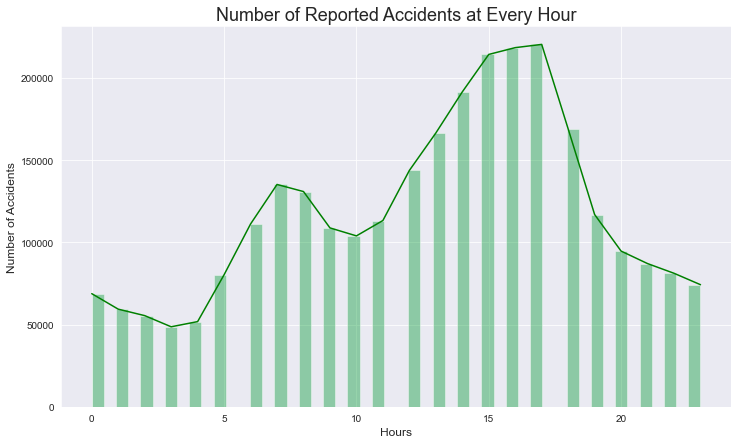

In [57]:
plt.figure(figsize=(12,7))
#sns.histplot(df.Start_Time.dt.hour, color = '#009999')
sns.distplot(df.Start_Time.dt.hour, kde=False, norm_hist=False, color='#009933')
plt.plot(df.Start_Time.dt.hour.value_counts().sort_index().index, df.Start_Time.dt.hour.value_counts().sort_index().values, 'g')
plt.title("Number of Reported Accidents at Every Hour", size = 18)
plt.xlabel("Hours",size = 12)
plt.ylabel("Number of Accidents",size = 12)
plt.show()

- A high number of accidents occur in between 15:00 to 17:00 (Probably because people leaving from work in a hurry to reach home or fitness studio) 

### Year

In [58]:
pd.DatetimeIndex(df.Start_Time).year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Start_Time', length=2845342)

In [59]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Time, Length: 2845342, dtype: int64

In [60]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

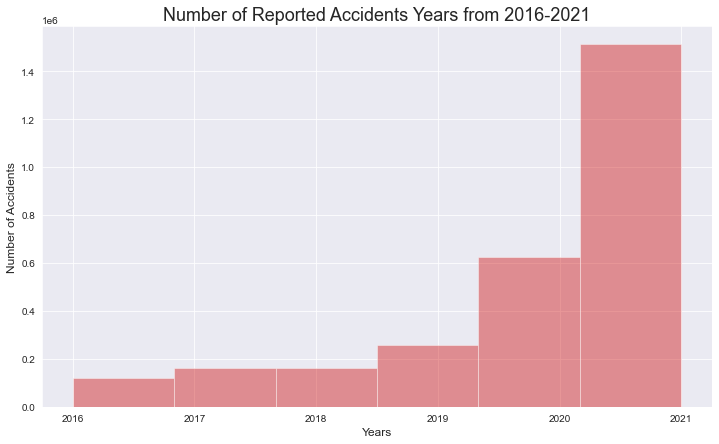

In [61]:
plt.figure(figsize=(12,7))
sns.distplot(df.Start_Time.dt.year, bins = 6, kde=False, norm_hist=False, color='#cc0000')
plt.title("Number of Reported Accidents Years from 2016-2021", size = 18)
plt.xlabel("Years",size = 12)
plt.ylabel("Number of Accidents",size = 12)
plt.show()

### Month

In [62]:
df.Start_Time.dt.month.value_counts()

12    473943
11    360696
10    299131
9     241822
6     226561
1     198365
2     194995
5     181944
8     178670
4     171880
7     159111
3     158224
Name: Start_Time, dtype: int64

In [63]:
df.Start_Time[df.Start_Time.dt.year == 2017].dt.month.value_counts().sum()

163918

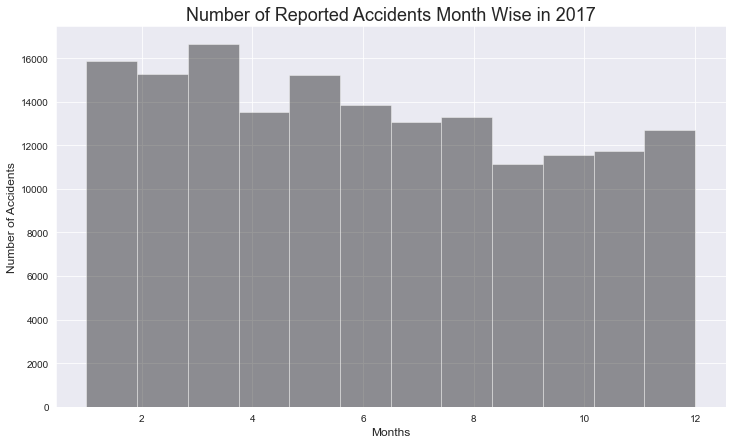

In [64]:
plt.figure(figsize=(12,7))

sns.distplot(df.Start_Time[df.Start_Time.dt.year == 2017].dt.month, bins=12, kde=False, norm_hist=False, color='black')
plt.title("Number of Reported Accidents Month Wise in 2017", size = 18)
plt.xlabel("Months",size = 12)
plt.ylabel("Number of Accidents",size = 12)
plt.show()

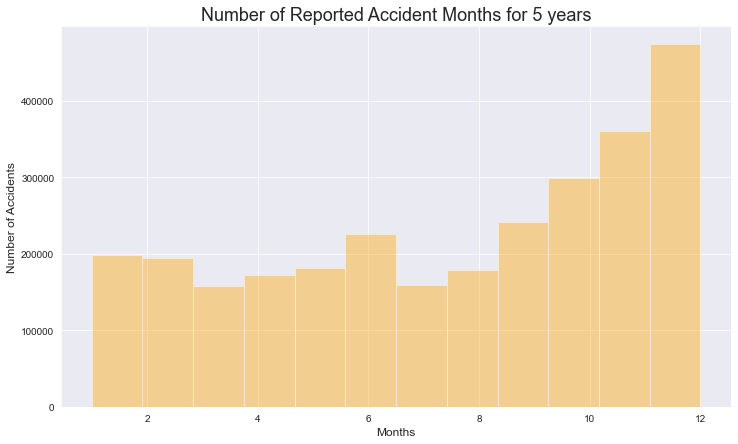

In [65]:
plt.figure(figsize=(12,7))
sns.distplot(df.Start_Time.dt.month, bins = 12, kde=False, norm_hist=False, color='orange')
plt.title("Number of Reported Accident Months for 5 years", size = 18)
plt.xlabel("Months",size = 12)
plt.ylabel("Number of Accidents",size = 12)
plt.show()

### Days of the week

In [66]:
df.Start_Time.dt.day_of_week.value_counts()

4    492074
3    463477
2    455037
1    443968
0    419821
5    311691
6    259274
Name: Start_Time, dtype: int64

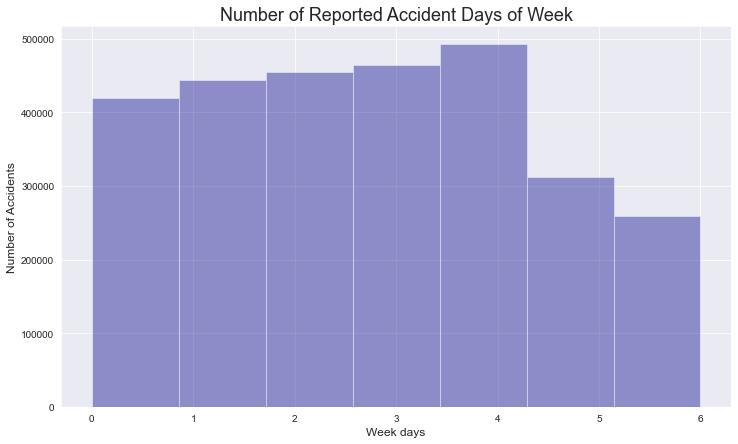

In [67]:
plt.figure(figsize=(12,7))
sns.distplot(df.Start_Time.dt.day_of_week, bins = 7, kde=False, norm_hist=False, color='darkblue')
plt.title("Number of Reported Accident Days of Week", size = 18)
plt.xlabel("Week days",size = 12)
plt.ylabel("Number of Accidents",size = 12)
plt.show()

### Comparing the distribution of Sundays and Mondays

In [68]:
df.Start_Time[df.Start_Time.dt.day_of_week == 6].dt.hour.value_counts() 

17    14783
15    14700
14    14668
16    14351
18    14045
13    14002
12    13128
19    12752
20    11718
11    11462
21    11238
0     10849
22    10129
10    10060
2      9897
1      9730
23     9011
3      8293
9      8029
8      7408
7      7394
6      7380
4      7134
5      7113
Name: Start_Time, dtype: int64

In [69]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.day_of_week == 6]
monday_start_time = df.Start_Time[df.Start_Time.dt.day_of_week == 0]


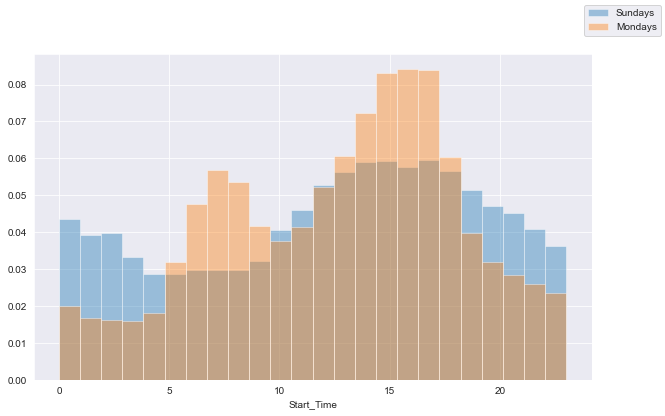

In [70]:
fig = plt.figure(figsize=(10,6))
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)
sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)
fig.legend(labels=['Sundays','Mondays'])
plt.show()


In [71]:
df.Start_Time[df.Start_Time.dt.month == 12].value_counts()

2020-12-16 13:53:25    82
2021-12-07 14:16:30    72
2021-12-14 10:39:00    71
2021-12-16 14:11:00    63
2021-12-04 14:50:11    57
                       ..
2017-12-18 08:48:36     1
2018-12-14 08:57:44     1
2021-12-12 23:58:00     1
2021-12-27 18:15:30     1
2020-12-20 03:46:04     1
Name: Start_Time, Length: 245313, dtype: int64

In [72]:
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]

<AxesSubplot:xlabel='Start_Time'>

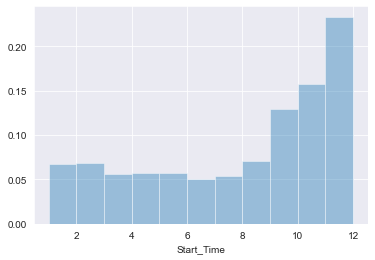

In [73]:
sns.distplot(df_2019.dt.month, bins = 11, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

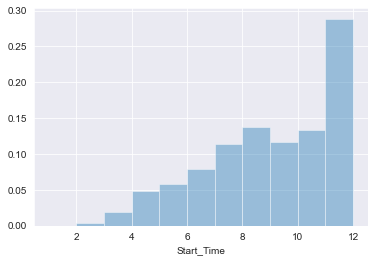

In [74]:
sns.distplot(df.Start_Time[df.Start_Time.dt.year == 2016].dt.month, bins = 11, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

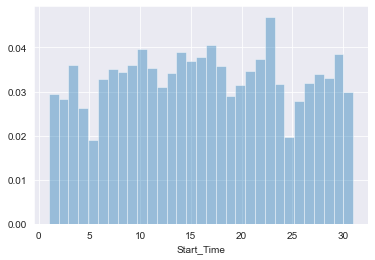

In [75]:
sns.distplot(df.Start_Time[df.Start_Time.dt.month == 12].dt.day, bins = 31, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

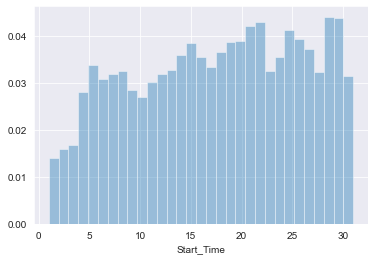

In [76]:
sns.distplot(df.Start_Time[df.Start_Time.dt.month == 10].dt.day, bins = 31, kde=False, norm_hist=True)


## 3. Latitude and Longitude

In [77]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [78]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

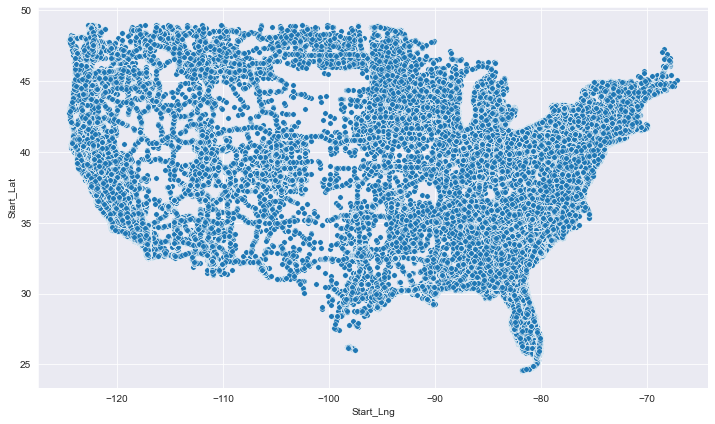

In [79]:
plt.figure(figsize=(12,7))
sns.scatterplot(df.Start_Lng, df.Start_Lat, s=30)

- Scatter Plot of 10% of the random samples

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

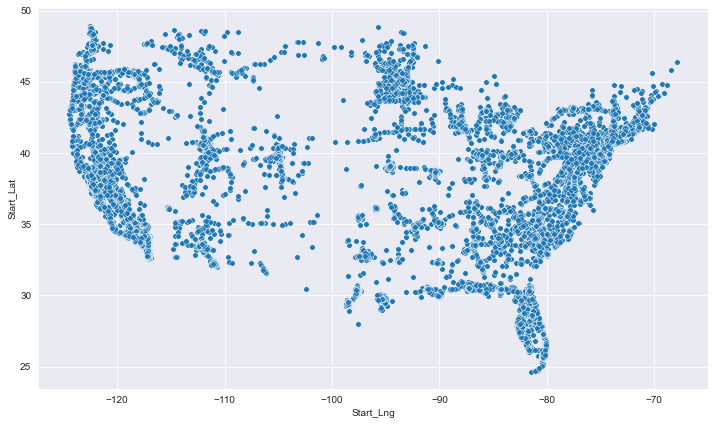

In [80]:
plt.figure(figsize=(12,7))
sns.scatterplot(df.sample(int(0.1 * len(df))).Start_Lng, df.sample(int(0.1 * len(df))).Start_Lat,s=30)

In [81]:
import folium

In [82]:
df.Start_Lat[504530], df.Start_Lng[504530]

(37.79373, -80.38502)

In [83]:
df[['Start_Lat', 'Start_Lng']].sample(10)

,Start_Lat,Start_Lng
367992,39.020894,-94.501122
1735466,35.733333,-78.575028
457080,37.166814,-122.026190
18818,32.671610,-96.965030
2216071,47.705770,-122.179940
283110,38.849013,-76.965663
1377036,38.859073,-77.867630
1188189,25.747530,-80.337365
1442920,37.583964,-122.328361
1388632,33.722351,-81.101042


In [84]:
locations = df[['Start_Lat', 'Start_Lng']].sample(2000)
locationlist = locations.values.tolist()
len(locationlist)
locationlist[1]

[45.04212, -93.10123]

In [85]:
map = folium.Map()
for point in range(0, len(locationlist)):
    #print("City: {}".format(df['City'][point]))
    my_string = "Latitude and Longitude {} of {}".format(locationlist[point],df['City'][point])
    #print("Latitude and Longitude {} of {}".format(locationlist[point],df['City'][point]))
    folium.Marker(locationlist[point], popup=my_string).add_to(map)

map

#### Heat Map

In [86]:
from folium.plugins import HeatMap


In [87]:
map = folium.Map()
HeatMap(locationlist, popup=my_string).add_to(map)
map

#### Cluster

In [88]:
m = folium.Map()
#locations = list(zip(airbnb_data.latitude, airbnb_data.longitude))
cluster = folium.plugins.MarkerCluster(locations=locationlist,                     
               popup = my_string).add_to(m)
#m.add_child(cluster)
m

### Ask and Answer Questions
1. Which 5 Cities have the highest number of accidents?
> Miami(106966), Los Angeles(68956), Orlando(54691), Dallas(41979), Houston(39448).
2. Which 5 States have the highest number of accidents? 
> CA    (795868),
FL    (401388),
TX    (149037),
OR    (126341),
VA    (113535)
3. Does Washington show up in the data? 
> Yes, it does and the reported cases in Washington are 9624.
4. What time of the day are accidents most frequent in?
> Between 15:17 highest number of accidents are reported. 
5. Which days of the week have the most accidents?
> On Fridays are the most reported accidents are reported.
6. Which months have the most accidents?
> Decembers
7. What is the trend of the accidents year over year(decreasing/increasing)?
> Increasing, Because according to my assumption there is missing data in the dataset of early years because of the initial implementation of the data collection.

### Summary and Conclusion


#### Insights
- Around 4.5%, 496 of the cities have more than 1000 accidents
- Around 95.5, 11185 of the cities have less than 1000 accidents
- 1110 Cities have reported just "One" accident in almost 5 years. (Data needs to be investigated)
- Hourly wise data: A high number of accidents occur in between 15:00 to 17:00 (Probably because people leaving from work in a hurry to reach home or fitness studio)
- Year wise data: A high number of accidents occur in Year 2021 (One reason could be that in 2016 and 2017 the implementation was new, and maybe becuase of that data is missing for those years)
- Month wise data: A high number of accidents occur in Decembers, Novembers and Octobers.